In [44]:
##This file showcases UG's vehicle top speed statistics##
##First, we will import the required libraries
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [45]:
vehicles = pd.read_csv("C:\\Users\\rzdat\\OneDrive\\Desktop\\ug-data\\ug-database\\data\\Vehicle_data.csv")

In [46]:
vehicles.head()

,MODEL ID,MODEL NAME,GXT NAME,VEHICLE TYPE,VEHICLE CLASS,TOP SPEED
0,25397,cm_admiral,Admiral,Car (0),Rich (2),163.44 km/h
1,6578,vc_admiral,Admiral,Car (0),Rich (2),163.44 km/h
2,445,admiral,Admiral,Car (0),Rich (2),163.44 km/h
3,6666,vc_aamb,Air Ambulance,Helicopter (3),Normal (0),237.84 km/h
4,25485,mplc_fireheli,Air Firetruck,Helicopter (3),Normal (0),237.84 km/h


In [47]:
vehicletypes = vehicles["VEHICLE TYPE"].value_counts()
vehtypelist = ["Cars", "Motorcycles", "Helicopters", "Boats", "Planes", "BMX", "Trailers", "Trains", "Monstertruck", "Quad Bikes"]
ex = [0,0,0,0,0,0,0.3,0.7,1,1.5]

In [48]:
vehicletypes

Car (0)             528
Bike (9)             46
Helicopter (3)       43
Boat (5)             34
Plane (4)            32
BMX (10)             16
Trailer (11)         13
Train (6)            10
Monstertruck (1)      7
Quad (2)              2
Name: VEHICLE TYPE, dtype: int64

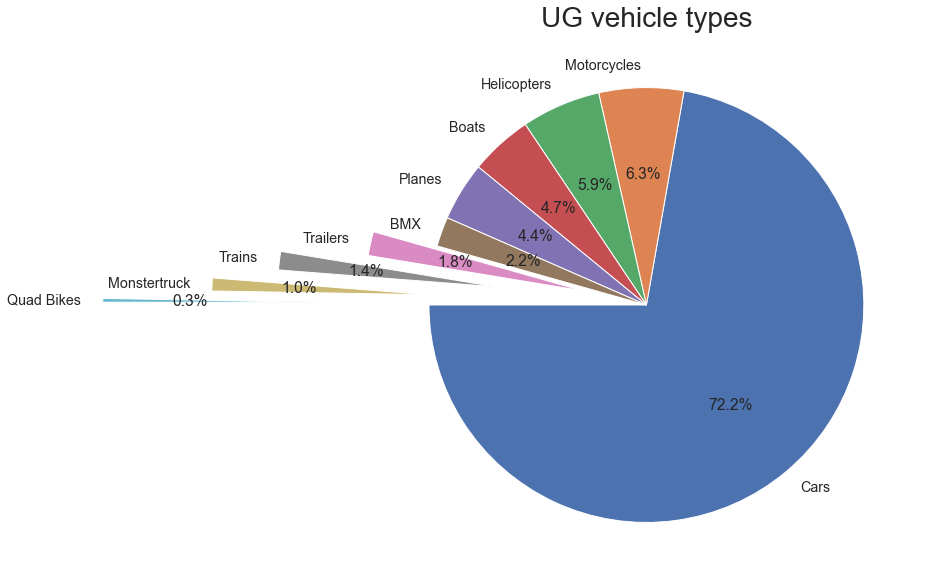

In [50]:
plt.figure(figsize=(16,10))
plt.title("UG vehicle types", fontsize = 28)
sns.set(font_scale=1.3)
plt.pie(x = vehicletypes, labels = vehtypelist, autopct = '%.1f%%' , explode = ex, startangle = -180, shadow = False)
plt.show()

In [11]:
cars = vehicles.query("`VEHICLE TYPE`=='Car (0)'")

In [12]:
##Since TOP SPEED is considered object and not float, we will need to delete the km/h and convert it from object to float64
cars["TOP SPEED"] = cars["TOP SPEED"].str.replace('km/h', '').astype(float)

C:\Users\rzdat\AppData\Local\Temp\ipykernel_19048\4113319618.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars["TOP SPEED"] = cars["TOP SPEED"].str.replace('km/h', '').astype(float)


In [13]:
fastest_cars = cars.sort_values("TOP SPEED", ascending = False).head(10)

In [14]:
##Let's check if the conversion is successful
fastest_cars.dtypes

MODEL ID           int64
MODEL NAME        object
GXT NAME          object
VEHICLE TYPE      object
VEHICLE CLASS     object
TOP SPEED        float64
dtype: object

In [15]:
##Done, we can now create the graph for this data query
fastest_cars

,MODEL ID,MODEL NAME,GXT NAME,VEHICLE TYPE,VEHICLE CLASS,TOP SPEED
596,25416,mp_f1b,Sonic,Car (0),Normal (0),250.00
597,25415,mp_f1a,Sonic,Car (0),Normal (0),250.00
595,25417,mp_f1c,Sonic,Car (0),Normal (0),250.00
167,6664,vc_countach,Countcash,Car (0),Executive (3),239.04
324,6615,vc_infernus,Infernus,Car (0),Executive (3),238.08
325,6561,lc_infernus,Infernus,Car (0),Executive (3),226.56
326,411,infernus,Infernus,Car (0),Executive (3),221.04
176,4790,lcs_deimos,Deimos SP,Car (0),Executive (3),221.04
643,25411,mp_tahomar,Tahoma Racer,Car (0),Normal (0),214.32
497,4803,ug_stanier_r,Premier Racer,Car (0),Normal (0),214.32


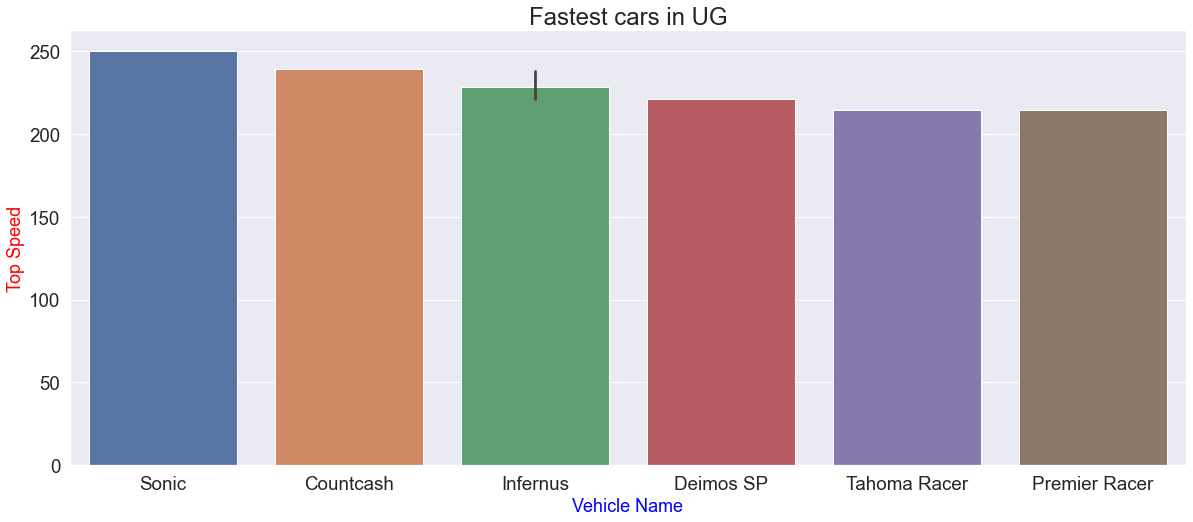

In [16]:
##Now lets create the graph that showcases the fastest vehicles of type 0 (Car)
plt.figure(figsize = (20,8))
sns.set(font_scale=1.7)
sns.set_style('darkgrid')
sns.barplot(x = 'GXT NAME', y = "TOP SPEED", data = fastest_cars)
plt.title("Fastest cars in UG", fontsize = 24)
plt.xlabel("Vehicle Name", fontsize = 18, color = "blue")
plt.ylabel("Top Speed", fontsize = 18, color = "red")
plt.show()

In [17]:
cars

,MODEL ID,MODEL NAME,GXT NAME,VEHICLE TYPE,VEHICLE CLASS,TOP SPEED
0,25397,cm_admiral,Admiral,Car (0),Rich (2),163.44
1,6578,vc_admiral,Admiral,Car (0),Rich (2),163.44
2,445,admiral,Admiral,Car (0),Rich (2),163.44
6,6763,bw_airmax,Airmaster,Car (0),Normal (0),140.16
10,602,alpha,Alpha,Car (0),Executive (3),168.72
...,...,...,...,...,...,...
725,662,lc_yardie,Yardie Lobo,Car (0),Executive (3),175.20
727,554,yosemite,Yosemite,Car (0),Normal (0),143.52
728,798,vc_zebra,Zebra,Car (0),Taxi (6),148.80
729,25557,mw_zion,Zion,Car (0),Rich (2),174.24


In [18]:
plotorder = ["Normal (0)", "Poor (1)", "Rich (2)", "Executive (3)", "Worker (4)", "Big (5)", "Taxi (6)"]

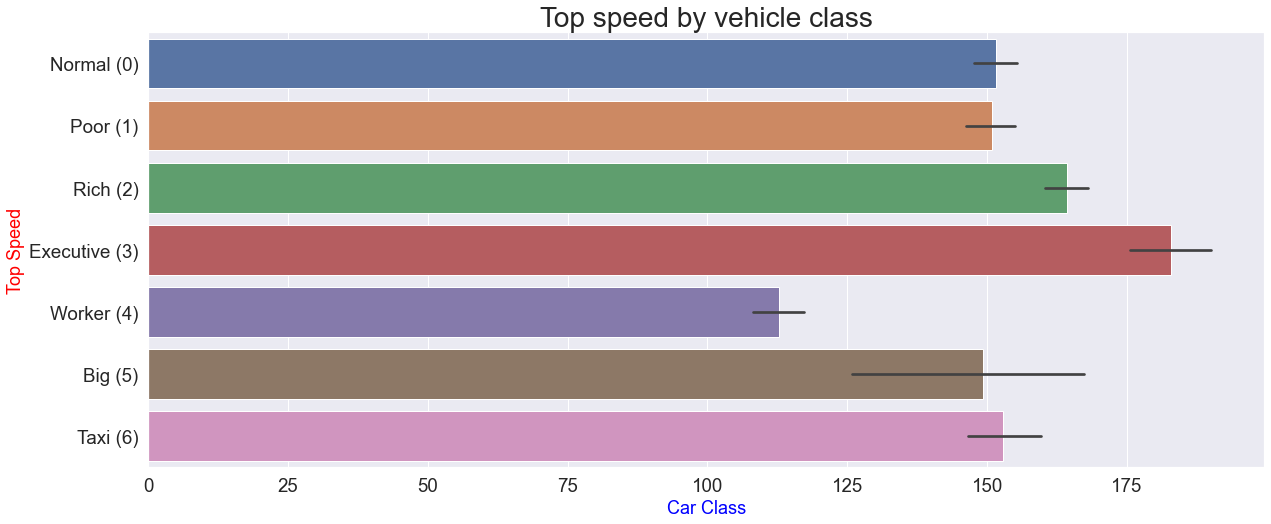

In [19]:
plt.figure(figsize = (20,8))
sns.set_style('darkgrid')
sns.barplot(y = 'VEHICLE CLASS', x = "TOP SPEED", data = cars, order = plotorder)
plt.title("Top speed by vehicle class", fontsize = 28)
plt.xlabel("Car Class", fontsize = 18, color = "blue")
plt.ylabel("Top Speed", fontsize = 18, color = "red")
plt.show()

In [20]:
vehicles["VEHICLE TYPE"].head(10)

0           Car (0)
1           Car (0)
2           Car (0)
3    Helicopter (3)
4    Helicopter (3)
5    Helicopter (3)
6           Car (0)
7         Plane (4)
8         Plane (4)
9         Plane (4)
Name: VEHICLE TYPE, dtype: object

In [21]:
vehicles.drop_duplicates(subset = "VEHICLE TYPE")

,MODEL ID,MODEL NAME,GXT NAME,VEHICLE TYPE,VEHICLE CLASS,TOP SPEED
0,25397,cm_admiral,Admiral,Car (0),Rich (2),163.44 km/h
3,6666,vc_aamb,Air Ambulance,Helicopter (3),Normal (0),237.84 km/h
7,3248,airtrain,Airtrain,Plane (4),Normal (0),94.8004 km/h
11,6788,vcs_speeder,Ambassador,Boat (5),Boat - leisure (9),76.8003 km/h
21,25641,vcs_angel,Angel,Bike (9),Motorcycle (8),165.36 km/h
28,435,artict1,Articulated Trailer 1,Trailer (11),Normal (0),141.84 km/h
66,25505,bw_bmxs,Bike,BMX (10),Bicycle (11),85.6802 km/h
110,570,streakc,Brown Streak,Train (6),Normal (0),129.84 km/h
194,406,dumper,Dumper,Monstertruck (1),Worker (4),110 km/h
504,25517,vcs_quad,Quadbike,Quad (2),Normal (0),115.2 km/h


In [22]:
vehicletypes = ["Car (0)", "Monstertruck (1)", "Quad (2)", "Helicopter (3)", "Plane (4)", "Boat (5)", "Train (6)", "Bike (9)", "BMX (10)", "Trailer (11)"]

In [23]:
#Let's try to do the same, but for planes
planes = vehicles.query("`VEHICLE TYPE` == 'Plane (4)'")

In [24]:
planes.head(10)

,MODEL ID,MODEL NAME,GXT NAME,VEHICLE TYPE,VEHICLE CLASS,TOP SPEED
7,3248,airtrain,Airtrain,Plane (4),Normal (0),94.8004 km/h
8,6696,lcs_airtrain,Airtrain,Plane (4),Normal (0),94.8004 km/h
9,6272,vcs_airtrain,Airtrain,Plane (4),Normal (0),94.8004 km/h
20,592,androm,Andromada,Plane (4),Normal (0),99.6003 km/h
27,6538,ug_armhyd,Army Hydra,Plane (4),Normal (0),43.4404 km/h
33,6781,vc_at400_4,AT-400,Plane (4),Normal (0),99.6003 km/h
34,6780,vc_at400_3,AT-400,Plane (4),Normal (0),99.6003 km/h
35,6779,vc_at400_2,AT-400,Plane (4),Normal (0),99.6003 km/h
36,6778,vc_at400_1,AT-400,Plane (4),Normal (0),99.6003 km/h
37,577,at400,AT-400,Plane (4),Normal (0),99.6003 km/h


In [25]:
##Just like before, we will convert the top speed to data type float in order to help us order the planes by their top speed in decending order.
planes["TOP SPEED"] = planes["TOP SPEED"].str.replace('km/h', '').astype(float)

C:\Users\rzdat\AppData\Local\Temp\ipykernel_19048\290168006.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  planes["TOP SPEED"] = planes["TOP SPEED"].str.replace('km/h', '').astype(float)


In [26]:
planes.head(10)

,MODEL ID,MODEL NAME,GXT NAME,VEHICLE TYPE,VEHICLE CLASS,TOP SPEED
7,3248,airtrain,Airtrain,Plane (4),Normal (0),94.8004
8,6696,lcs_airtrain,Airtrain,Plane (4),Normal (0),94.8004
9,6272,vcs_airtrain,Airtrain,Plane (4),Normal (0),94.8004
20,592,androm,Andromada,Plane (4),Normal (0),99.6003
27,6538,ug_armhyd,Army Hydra,Plane (4),Normal (0),43.4404
33,6781,vc_at400_4,AT-400,Plane (4),Normal (0),99.6003
34,6780,vc_at400_3,AT-400,Plane (4),Normal (0),99.6003
35,6779,vc_at400_2,AT-400,Plane (4),Normal (0),99.6003
36,6778,vc_at400_1,AT-400,Plane (4),Normal (0),99.6003
37,577,at400,AT-400,Plane (4),Normal (0),99.6003


In [27]:
fastest_planes = planes.sort_values("TOP SPEED", ascending = False).head(10)

In [28]:
##Despite showing us the fastest planes in the game, this data is wrong
#It doesn't show us planes faster than 100km/h for some reason, could be an error caused by the game's debug output?
fastest_planes

,MODEL ID,MODEL NAME,GXT NAME,VEHICLE TYPE,VEHICLE CLASS,TOP SPEED
425,25549,mw_lazer,P-996 LAZER,Plane (4),Normal (0),200.0000
36,6778,vc_at400_1,AT-400,Plane (4),Normal (0),99.6003
20,592,androm,Andromada,Plane (4),Normal (0),99.6003
37,577,at400,AT-400,Plane (4),Normal (0),99.6003
33,6781,vc_at400_4,AT-400,Plane (4),Normal (0),99.6003
34,6780,vc_at400_3,AT-400,Plane (4),Normal (0),99.6003
35,6779,vc_at400_2,AT-400,Plane (4),Normal (0),99.6003
8,6696,lcs_airtrain,Airtrain,Plane (4),Normal (0),94.8004
7,3248,airtrain,Airtrain,Plane (4),Normal (0),94.8004
9,6272,vcs_airtrain,Airtrain,Plane (4),Normal (0),94.8004


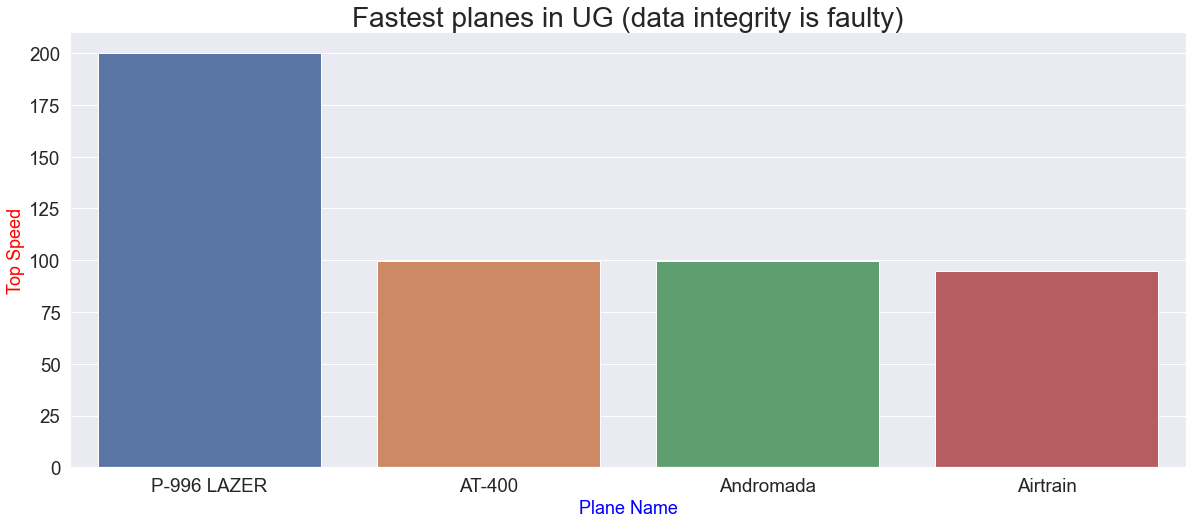

In [29]:
plt.figure(figsize = (20,8))
sns.set_style('darkgrid')
sns.barplot(x = 'GXT NAME', y = "TOP SPEED", data = fastest_planes)
plt.title("Fastest planes in UG (data integrity is faulty)", fontsize = 28)
plt.xlabel("Plane Name", fontsize = 18, color = "blue")
plt.ylabel("Top Speed", fontsize = 18, color = "red")
plt.show()

In [30]:
##Here we can see the only plane with speed bigger than 100km/h, there are more planes faster than that but for some reason their speed is displayed lower than 100 km/h.
##To solve this, we will need to re-calculate the speed for fighter jets, but that won't be done here.
planes.query("`TOP SPEED` > 100")

,MODEL ID,MODEL NAME,GXT NAME,VEHICLE TYPE,VEHICLE CLASS,TOP SPEED
425,25549,mw_lazer,P-996 LAZER,Plane (4),Normal (0),200.0


In [31]:
##Again, but for Motorcycles/Bikes
##Hmmmmmmmm nice bike!
bikes = vehicles.query("`VEHICLE TYPE` == 'Bike (9)'")

In [32]:
bikes["TOP SPEED"] = bikes["TOP SPEED"].str.replace('km/h', '').astype(float)

C:\Users\rzdat\AppData\Local\Temp\ipykernel_19048\579723301.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikes["TOP SPEED"] = bikes["TOP SPEED"].str.replace('km/h', '').astype(float)


In [33]:
fastest_bikes = bikes.sort_values("TOP SPEED", ascending = False).head(10)

In [34]:
fastest_bikes

,MODEL ID,MODEL NAME,GXT NAME,VEHICLE TYPE,VEHICLE CLASS,TOP SPEED
420,6795,sol_nrg500rr,NRG-500RR,Bike (9),Motorcycle (8),298.08
38,3138,lcs_avenger,Avenger,Bike (9),Motorcycle (8),193.44
418,522,nrg500,NRG-500,Bike (9),Motorcycle (8),191.28
709,6269,mw_warthog,Warthog,Bike (9),Motorcycle (8),191.04
419,6794,sol_nrg500f,NRG-500F,Bike (9),Motorcycle (8),177.84
438,461,pcj600,PCJ-600,Bike (9),Motorcycle (8),176.16
437,6629,vc_pcj600,PCJ-600,Bike (9),Motorcycle (8),176.16
436,3224,lcs_pcj600,PCJ-600,Bike (9),Motorcycle (8),176.16
237,521,fcr900,FCR-900,Bike (9),Motorcycle (8),176.16
224,6270,mw_falcon,Falcon,Bike (9),Motorcycle (8),166.80


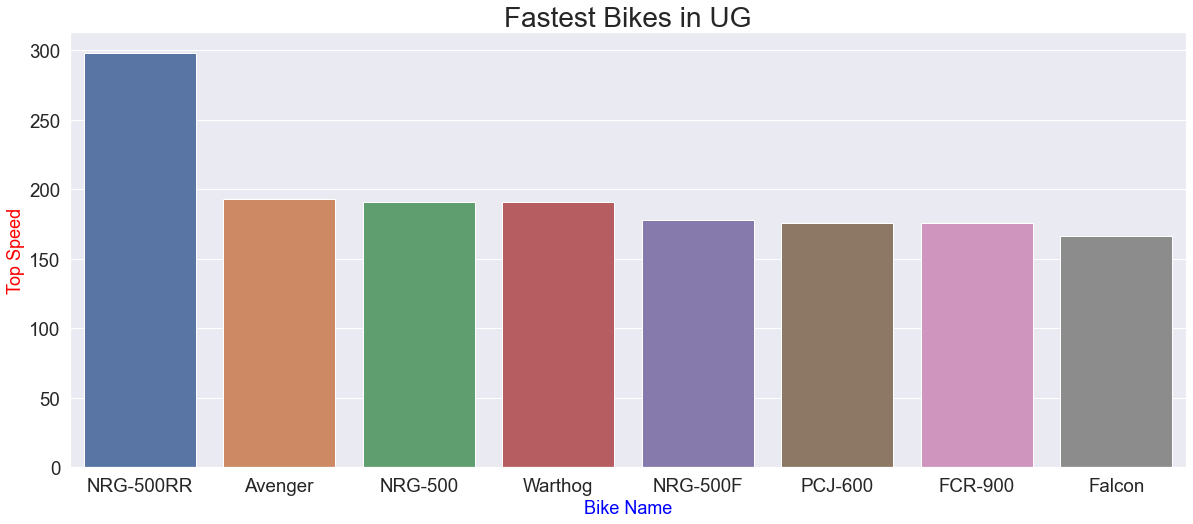

In [35]:
plt.figure(figsize = (20,8))
sns.set_style('darkgrid')
sns.barplot(x = 'GXT NAME', y = "TOP SPEED", data = fastest_bikes)
plt.title("Fastest Bikes in UG", fontsize = 28)
plt.xlabel("Bike Name", fontsize = 18, color = "blue")
plt.ylabel("Top Speed", fontsize = 18, color = "red")
plt.show()

In [36]:
boats = vehicles.query("`VEHICLE TYPE` == 'Boat (5)'")

In [37]:
boats.head()

,MODEL ID,MODEL NAME,GXT NAME,VEHICLE TYPE,VEHICLE CLASS,TOP SPEED
11,6788,vcs_speeder,Ambassador,Boat (5),Boat - leisure (9),76.8003 km/h
158,6765,vc_coastg,Coastguard,Boat (5),Normal (0),61.6803 km/h
159,472,coastg,Coastguard,Boat (5),Normal (0),61.6803 km/h
183,6766,vc_dinghy,Dinghy,Boat (5),Boat - worker (10),53.0404 km/h
184,473,dinghy,Dinghy,Boat (5),Boat - worker (10),53.0404 km/h


In [38]:
boats["TOP SPEED"] = boats["TOP SPEED"].str.replace('km/h', '').astype(float)

C:\Users\rzdat\AppData\Local\Temp\ipykernel_19048\65269492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boats["TOP SPEED"] = boats["TOP SPEED"].str.replace('km/h', '').astype(float)


In [39]:
fastest_boats = boats.sort_values("TOP SPEED", ascending = False).head(10)

In [40]:
fastest_boats

,MODEL ID,MODEL NAME,GXT NAME,VEHICLE TYPE,VEHICLE CLASS,TOP SPEED
332,493,jetmax,Jetmax,Boat (5),Normal (0),85.4403
609,446,squalo,Squalo,Boat (5),Normal (0),85.4403
608,6773,vc_squalo,Squalo,Boat (5),Normal (0),85.4403
331,6767,vc_jetmax,Jetmax,Boat (5),Normal (0),85.4403
726,6787,vc_yola,Yola,Boat (5),Boat - worker (10),77.8802
696,6551,vc_scarab,Violator,Boat (5),Boat - leisure (9),76.8003
605,452,speeder,Speeder,Boat (5),Boat - leisure (9),76.8003
604,6671,lc_speeder,Speeder,Boat (5),Boat - leisure (9),76.8003
603,6772,vc_speeder,Speeder,Boat (5),Boat - leisure (9),76.8003
602,25537,lcs_speeder,Speeder,Boat (5),Boat - leisure (9),76.8003


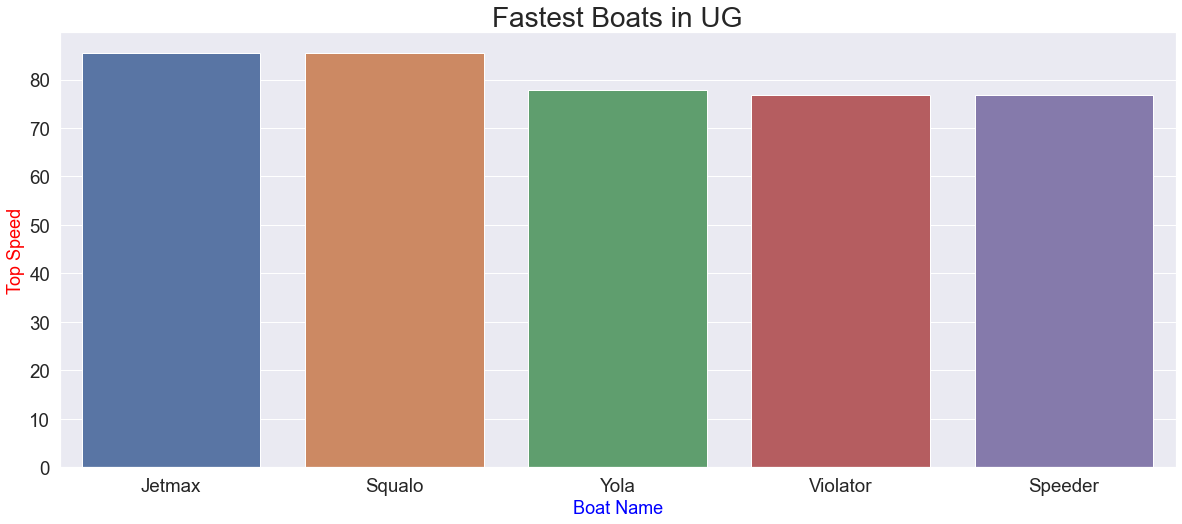

In [41]:
plt.figure(figsize = (20,8))
sns.set_style('darkgrid')
sns.barplot(x = 'GXT NAME', y = "TOP SPEED", data = fastest_boats)
plt.title("Fastest Boats in UG", fontsize = 28)
plt.xlabel("Boat Name", fontsize = 18, color = "blue")
plt.ylabel("Top Speed", fontsize = 18, color = "red")
plt.show()

In [53]:
helicopters = vehicles.query("`VEHICLE TYPE` == 'Helicopter (3)'")

In [55]:
helicopters.head(10)

,MODEL ID,MODEL NAME,GXT NAME,VEHICLE TYPE,VEHICLE CLASS,TOP SPEED
3,6666,vc_aamb,Air Ambulance,Helicopter (3),Normal (0),237.84 km/h
4,25485,mplc_fireheli,Air Firetruck,Helicopter (3),Normal (0),237.84 km/h
5,25428,mpvc_firehelif,Air Firetruck,Helicopter (3),Normal (0),237.84 km/h
24,25645,cc_annihilator,Annihilator,Helicopter (3),Normal (0),237.84 km/h
26,6665,vc_armadillo,Armadillo,Helicopter (3),Normal (0),237.84 km/h
77,5099,cm_armymav,Bloodhound Maverick,Helicopter (3),Normal (0),237.84 km/h
142,548,cargobob,Cargobob,Helicopter (3),Normal (0),237.84 km/h
315,4769,vc_hunter,Hunter,Helicopter (3),Normal (0),237.84 km/h
316,425,hunter,Hunter,Helicopter (3),Normal (0),237.84 km/h
350,417,leviathn,Leviathan,Helicopter (3),Normal (0),237.84 km/h


In [56]:
helicopters["TOP SPEED"] = helicopters["TOP SPEED"].str.replace('km/h', '').astype(float)

C:\Users\rzdat\AppData\Local\Temp\ipykernel_19048\847191325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  helicopters["TOP SPEED"] = helicopters["TOP SPEED"].str.replace('km/h', '').astype(float)


In [64]:
fastest_helicopters = helicopters.sort_values("TOP SPEED", ascending = False).head(10)

In [65]:
##All helis are literally the same speed lol
fastest_helicopters

,MODEL ID,MODEL NAME,GXT NAME,VEHICLE TYPE,VEHICLE CLASS,TOP SPEED
3,6666,vc_aamb,Air Ambulance,Helicopter (3),Normal (0),237.84
476,4781,ul_polmav,Police Maverick,Helicopter (3),Normal (0),237.84
414,488,vcnmav,News Chopper,Helicopter (3),Normal (0),237.84
470,4778,cc_polarm,Police Armadillo,Helicopter (3),Normal (0),237.84
471,25363,at_polmav,Police Maverick,Helicopter (3),Normal (0),237.84
472,25362,mw_polmav,Police Maverick,Helicopter (3),Normal (0),237.84
473,25358,sf_polmav,Police Maverick,Helicopter (3),Normal (0),237.84
474,25357,lv_polmav,Police Maverick,Helicopter (3),Normal (0),237.84
475,25356,ls_polmav,Police Maverick,Helicopter (3),Normal (0),237.84
477,5696,cm_polmav,Police Maverick,Helicopter (3),Normal (0),237.84
